<a href="https://colab.research.google.com/github/rajayourfriend/EIP_Assignments/blob/master/EIP4_Assignment01_1st_DNN_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


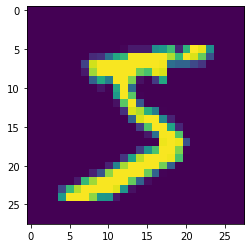

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(32, 1, 1, activation='relu', input_shape=(28,28,1)))#28
model.add(Convolution2D(32, 3, 3, activation='relu'))#26
model.add(Convolution2D(64, 3, 3, activation='relu'))#24
model.add(Convolution2D(128, 3, 3, activation='relu'))#22

model.add(MaxPooling2D(2, 2))#11
model.add(Convolution2D(10, 1, activation='relu'))#11

model.add(Convolution2D(32, 3, activation='relu'))#9
model.add(Convolution2D(32, 3, activation='relu'))#7
model.add(Convolution2D(32, 3, activation='relu'))#5

model.add(Convolution2D(10, 5))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.


In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        64        
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 10)        1290      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 9, 9, 32)         

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 38s 626us/step - loss: 0.1645 - acc: 0.9487
Epoch 2/10
60000/60000 [==============================] - 35s 581us/step - loss: 0.0524 - acc: 0.9841
Epoch 3/10
60000/60000 [==============================] - 34s 561us/step - loss: 0.0390 - acc: 0.9882
Epoch 4/10
60000/60000 [==============================] - 33s 551us/step - loss: 0.0311 - acc: 0.9902
Epoch 5/10
60000/60000 [==============================] - 33s 546us/step - loss: 0.0254 - acc: 0.9918
Epoch 6/10
60000/60000 [==============================] - 33s 545us/step - loss: 0.0212 - acc: 0.9931
Epoch 7/10
60000/60000 [==============================] - 33s 544us/step - loss: 0.0191 - acc: 0.9941
Epoch 8/10
60000/60000 [==============================] - 33s 551us/step - loss: 0.0151 - acc: 0.9951
Epoch 9/10
60000/60000 [==============================] - 33s 545us/step - loss: 0.0159 - acc: 0.9946
Epoch 10/10
60000/60000 [==============================] - 33s 546us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.029134800771597656, 0.9912]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.2188308e-14 1.7611142e-11 4.3251065e-09 1.8139413e-09 3.8777961e-14
  8.6732081e-14 6.6004430e-18 1.0000000e+00 1.1141582e-11 2.2753126e-10]
 [7.8726775e-11 4.2905752e-11 9.9999976e-01 5.5110960e-16 6.2341944e-11
  8.7624101e-15 2.7957222e-07 3.3237447e-14 3.1725154e-09 9.8169001e-18]
 [2.3787925e-08 9.9997032e-01 4.3775250e-07 1.2216786e-09 3.0942836e-06
  3.5985588e-06 3.3010409e-07 6.3008861e-06 1.5802991e-05 6.8222961e-10]
 [9.9998200e-01 3.1398389e-12 1.5358721e-09 9.2592263e-09 3.1190359e-09
  1.8079039e-07 3.2895257e-06 1.3547717e-09 1.4046644e-05 5.1302192e-07]
 [1.6924428e-13 5.5108338e-11 2.0945021e-12 1.7245786e-14 9.9993062e-01
  6.1435064e-13 1.9709840e-11 5.6152795e-12 8.4366784e-11 6.9379319e-05]
 [9.2232089e-09 9.9997354e-01 2.2875804e-06 4.9483834e-10 5.2772921e-06
  1.2538916e-07 6.3401529e-08 2.2923782e-06 1.6490099e-05 1.4426272e-09]
 [4.3862331e-14 4.7304738e-09 8.2571137e-11 9.1698871e-13 9.9987841e-01
  7.4719730e-10 1.6631065e-10 6.9762045e-08 9.3229304e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

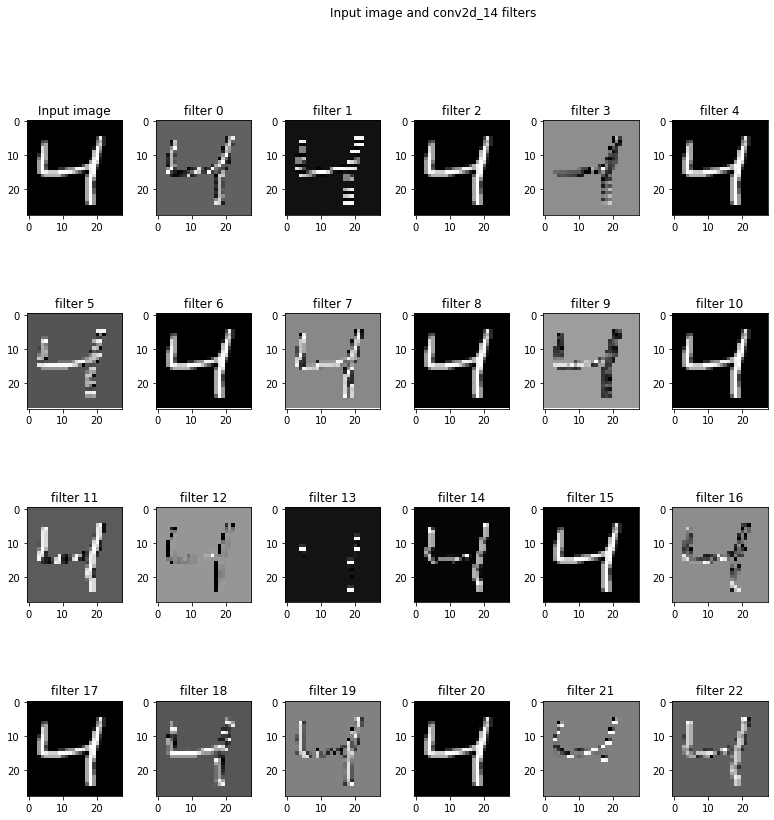

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()